1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
# downloading the dataset 
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2022-12-01 10:25:29--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-12-01 10:25:29--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucad793c1038840d1307ba7aeffd.dl.dropboxusercontent.com/cd/0/inline/BxyJIBfKyiiuls-5g3LAzNkyl_XUnIqpl2Zn-6sy1OtF-PyKqhXg2tTH48qP7aCDFGPuMVwpsLAPNCiea4yunOsOFxXG3wwjbNnHMoSuRUNclTFbj1jp6MM9vBLt_6qqIlPwLZ8DNcc5BggvV_OEREVW2_Yg7s4IhSuRBMNX-SM9XA/file# [following]
--2022-12-01 10:25:29--  https://ucad793c1038840d1307ba7aeffd.dl.dropboxusercontent.com/cd/0/inline/BxyJIBfKyiiuls-5g3LAzNkyl_XUnIqpl2Zn-6sy1OtF

In [2]:
#Scrubbing data
import pandas as pd
df=pd.read_csv('./regression_generated.csv')
df.head()

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080


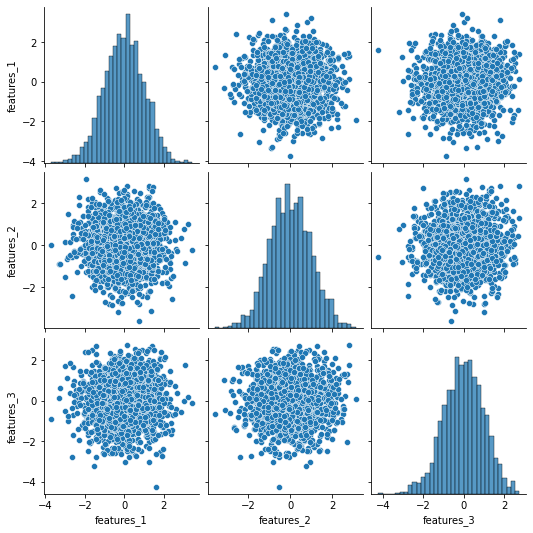

In [3]:
#Exploring data
import seaborn as sns
df=df[["features_1","features_2","features_3"]]
sns.pairplot(df)

The closer the data points come to forming a straight line when plotted, the higher the correlation between the two features, or the stronger the relationship. But, the data points are more spread out in centric form.
Hence we can say that the features are not correlated as there is no linear relation between each 2.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
#from IPython.display import Image
#Image('./two_categories_scatter_plot.png')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def dataset_gen(mean1,cov1,mean2,cov2,size=(1000,)):
  C1=np.random.multivariate_normal(mean1, cov1,size)
  df1 = pd.DataFrame(C1, columns=["x", "y"])
  C2=np.random.multivariate_normal(mean2, cov2, size)
  df2 = pd.DataFrame(C2, columns=["x", "y"])
  df = pd.concat([df1,df2], keys=["0", "1"])
  return df

df=dataset_gen([0, 1], [(1, .5), (.5, 1)],[1, 0], [(2, .5), (.5, 3)])

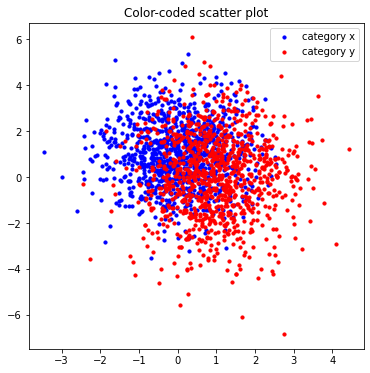

In [5]:
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(df.loc['0']['x'],df.loc['1']['x'], s=10, c='b', label='category x')
ax1.scatter(df.loc['0']['y'],df.loc['1']['y'], s=10, c='r', label='category y')
ax1.legend()
plt.title('Color-coded scatter plot')
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-12-01 10:26:26--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-01 10:26:26--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbe735c85fe761c0b999bd845ea.dl.dropboxusercontent.com/cd/0/inline/BxzslNs5vfXwdHb0LWpPKqhFCIg8eeK8Dw-p6SLvFMoEO-29-Cmn7P6_EhCeFfmg8ZHGplA9qlprS_CD1L6AyWhgEmvkQGc6feNqu1LDuUasTmUlRdSum_ArWbdMJx5qz3RzZUCHYE2BR_1nKWMOjaNZM6qmplSbhjnXkwqb34Vh8Q/file# [following]
--2022-12-01 10:26:28--  https://ucbe735c85fe761c0b999bd845ea.dl.dropboxusercontent.com/cd/0/inline/BxzslNs5vfXwdHb0LWpPKqhFCIg8eeK8Dw-p6SLvFMoEO-29-Cmn7P6_EhCeFfmg8

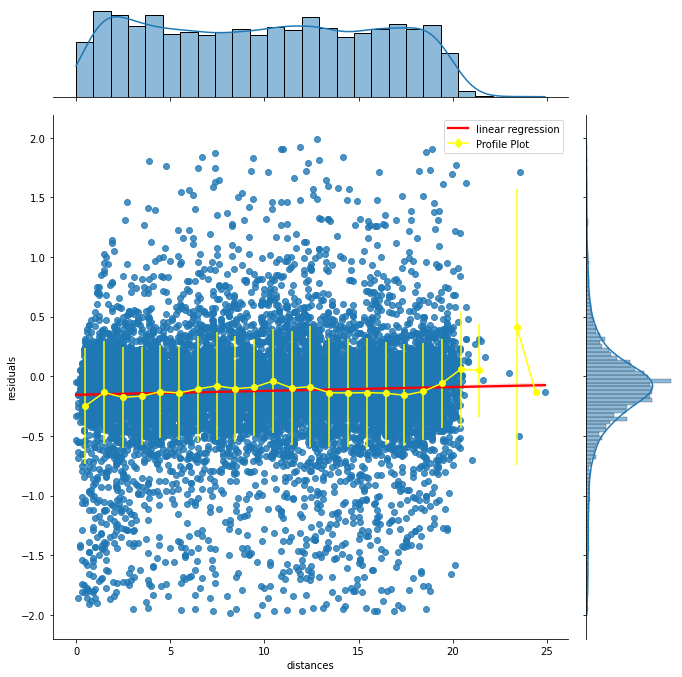

In [7]:
#Inspect the dataset, you'll find two variables (features)
import pickle
infile = open('./data/residuals_261.pkl', 'rb')
data =  pickle.load(infile).item()
infile.close()

#Convert the content to a Pandas Dataframe
df=pd.DataFrame(data)

#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = df[abs(df['residuals'] )< 2]

#Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 
import seaborn as sns
ax=sns.jointplot(x="distances", y="residuals", data=df, kind="reg",line_kws={"color": "r",'label':'linear regression'})
ax.fig.set_size_inches(10,10)
plt.sca(ax.ax_joint)

#Comment on the correlation between these variables.
#The two variables are not correlated as there exist no linear relationship between the two of them.
#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
his,bins= np.histogram(df['distances'],25)

#x, the array of bin centers of the profile histogram of the "distance" variable
x=((bins[1]-bins[0])/2) + bins[:-1]

#y, the mean values of the "residuals", estimated in slices (bins) of "distance"
y=np.zeros((len(x),))
for i in range(len(x)):
  y[i]=df[(df['distances'] >=bins[i]) & (df['distances'] <= bins[i+1])]['residuals'].mean()

#err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
err_y=np.zeros((len(x),))
for i in range(len(x)):
  err_y[i]=df[(df['distances'] >=bins[i]) & (df['distances'] <= bins[i+1])]['residuals'].std()

#Plot the profile plot on top of the scatter plot
plt.errorbar(x,y,yerr=err_y, label='Profile Plot',linewidth=1.5,color='yellow',marker='o')
ax.ax_joint.legend()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


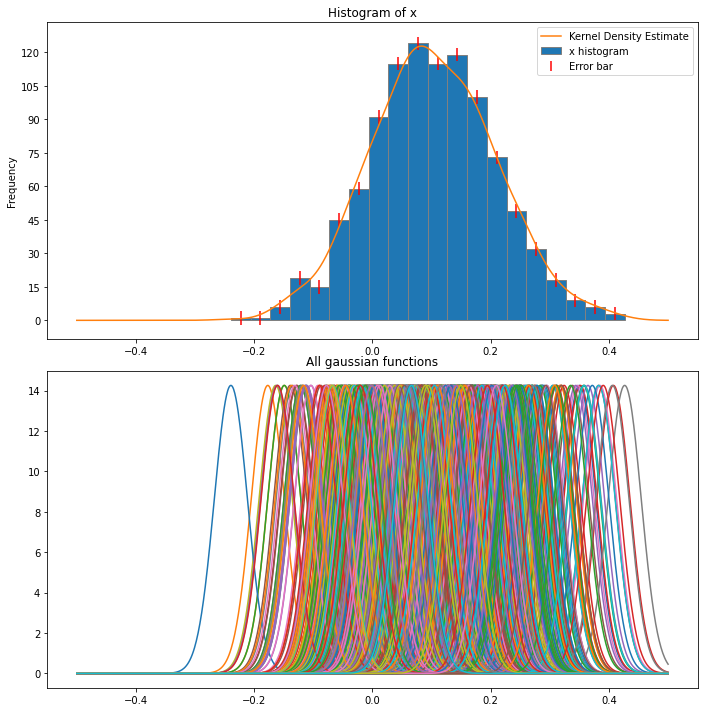

In [47]:
import scipy
from matplotlib.ticker import MaxNLocator

np.random.seed(22)
x=np.random.normal(0.1,0.1,(1000,))
fig, axs = plt.subplots(2,figsize=(10,10))
ax1 = axs[0]
h, bins, _ = ax1.hist(x, bins=20,edgecolor='grey',label='x histogram')
ax1.set_ylabel('x')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of x')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()
b=((bins[1]-bins[0])/2) + bins[:-1]
ax1.errorbar(b, h, yerr=3,ls='none',color='r',label='Error bar')

std_default = 1.06 * x.std() * x.size**(-1/5)
ax2 = axs[1]
s=[]
l = np.linspace(-1,1,1000)*0.5
for i in x:
  rv = scipy.stats.norm(i,std_default)
  s.append(rv.pdf(l))
  ax2.plot(l,rv.pdf(l))
ax2.set_title('All gaussian functions')

kde=sum(s)/1000*(scipy.integrate.trapz(h,x=bins[1:]))
ax1.plot(l,kde,label='Kernel Density Estimate')
ax1.legend()
